# Predicting Corona Cases in New York

In this notebook, we will use data made available by [New York Times](https://github.com/nytimes/covid-19-data). We will use `piecewise linear regression` to predict number of covid cases in New York. Data collection for this example is an ongoing process. For our study, we have taken data from March 1, 2020 to June 16, 2020.

In [1]:
library(segmented)

In [2]:
data = read.csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", header = T)
ny_data= data[data$state== "New York",]
ny_data = ny_data[1:106,]               # We use data From March 1, 2020 to June 16, 2020

In [3]:
head(ny_data)

,date,state,fips,cases,deaths
,<chr>,<chr>,<int>,<int>,<int>
247,2020-03-01,New York,36,1,0
262,2020-03-02,New York,36,1,0
277,2020-03-03,New York,36,2,0
294,2020-03-04,New York,36,11,0
314,2020-03-05,New York,36,22,0
339,2020-03-06,New York,36,44,0


In [4]:
tail(ny_data)

,date,state,fips,cases,deaths
,<chr>,<chr>,<int>,<int>,<int>
5438,2020-06-09,New York,36,384281,30309
5493,2020-06-10,New York,36,384945,30376
5548,2020-06-11,New York,36,385669,30431
5603,2020-06-12,New York,36,386490,30511
5658,2020-06-13,New York,36,387402,30565
5713,2020-06-14,New York,36,388096,30605


## Train test split

We take data for first 90 days to fit the piecewise linear model. Then we use the model to predict number of cases for the next 16 days.

In [5]:
train_indices = 1:90
test_indices =  91:dim(ny_data)[1]
cases_data = ny_data$cases
cases_train = cases_data[train_indices]
cases_test = cases_data[test_indices]
train_df = data.frame(time = train_indices, cases = cases_train)
test_df = data.frame(time = test_indices, cases = cases_test)

## Fit linear regression model

In [6]:
reg_model = lm(cases~time, data = train_df)
reg_pred = predict(reg_model, newdata = test_df)         # Prediction using linear regression

## Fit piecewise linear regression model

In [7]:
seg_model = segmented(reg_model, seg.Z = ~time, npsi = 2)
seg_pred = predict(seg_model, newdata = test_df)        # Prediction using piecewise linear regression

## Plot results

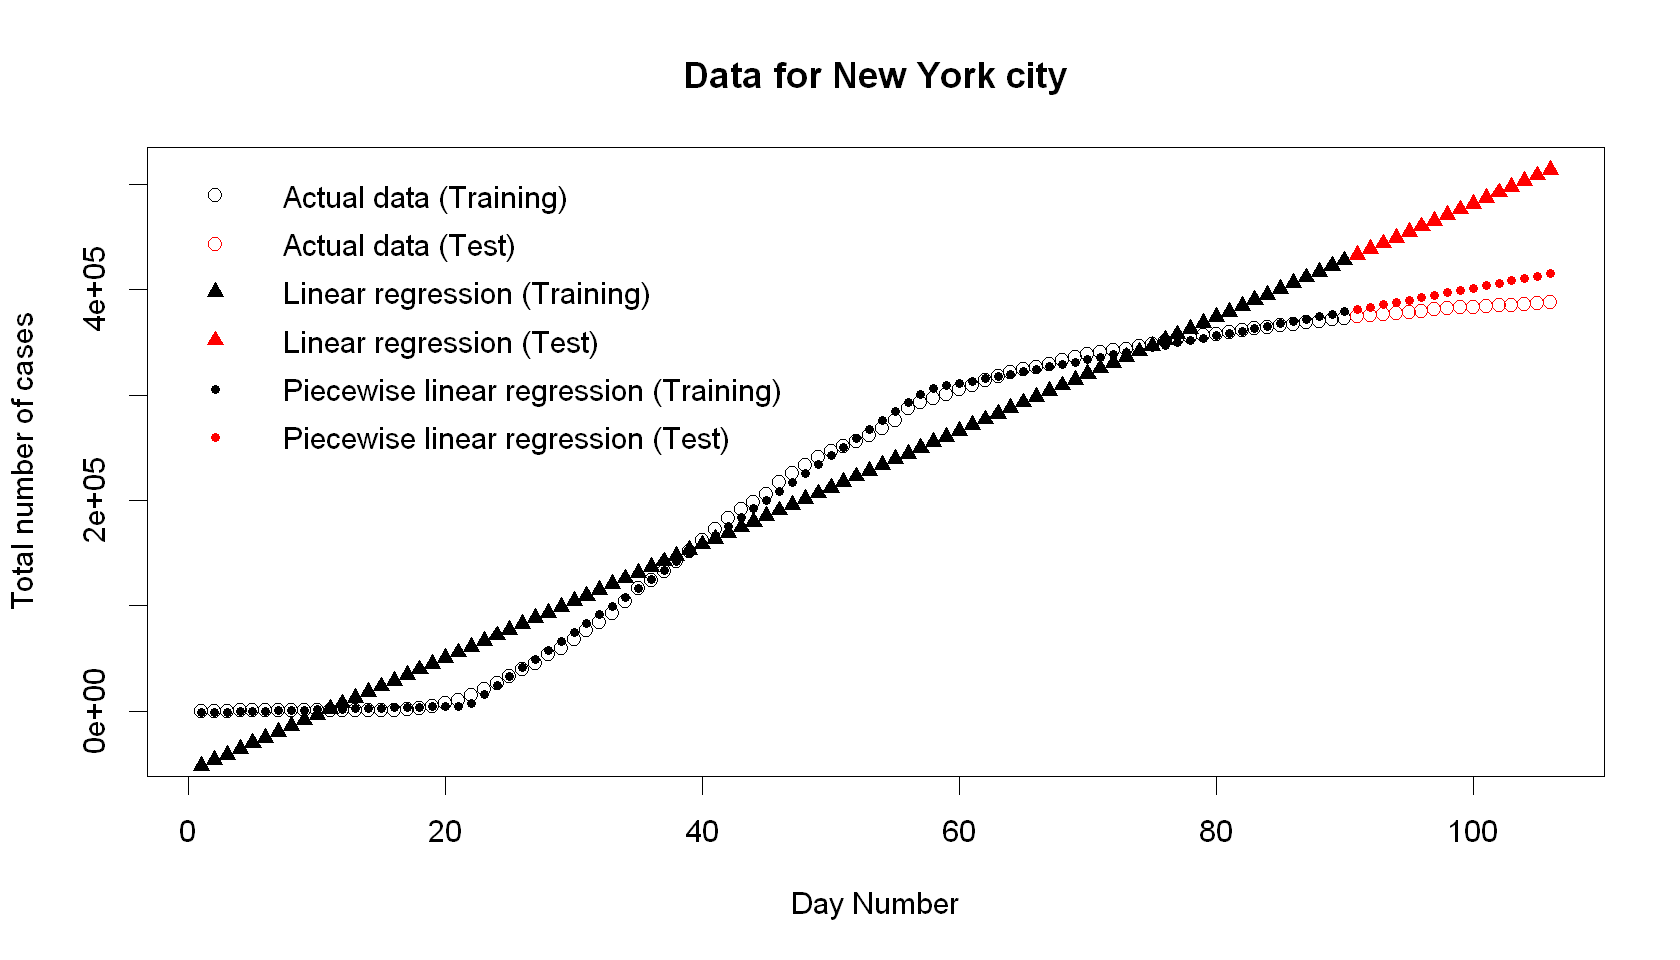

In [8]:
options(repr.plot.width=14, repr.plot.height=8)  # Figure size
op = par(cex = 1.5)
# Plot actual training data
plot(train_df$time, train_df$cases, 
     xlim = c(train_df$time[1], test_df$time[dim(test_df)[1]]),
     ylim = c(train_df$cases[1]-40000, test_df$cases[dim(test_df)[1]]+125000),
     xlab = "Day Number", ylab = "Total number of cases",
     main = "Data for New York city")

# Plot actual test data
points(test_df$time, test_df$cases, col = "red")

# Plot linear regression fit
points(train_df$time, fitted.values(reg_model), pch = 17)

# Plot Linear regression prediction
points(test_df$time, reg_pred, col = "red",pch = 17)

# Plot peicewise linear regression fit
points(train_df$time, fitted(seg_model), pch = 20 )

# Plot piecewise linear regression prediction
points(test_df$time, seg_pred, pch = 20, col = "red")

# Show legend
op = par(cex = 1.5)
legend("topleft",legend= c("Actual data (Training)", "Actual data (Test)",
                         "Linear regression (Training)",
                         "Linear regression (Test)",
                         "Piecewise linear regression (Training)",
                         "Piecewise linear regression (Test)"),
       col = rep(c("black","red"),times = 2),
       pch = c(1,1,17,17,20,20), bty = "n")

This example also shows some of the limitations of `simple linear regression`. From the above plot it can be seen that `linear regression` predicts number of cases to be negative at the initial stages of virus spread which is impractical.

In [9]:
sessionInfo()

R version 4.0.1 (2020-06-06)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 7 x64 (build 7601) Service Pack 1

Matrix products: default

locale:
[1] LC_COLLATE=English_United Kingdom.1252 
[2] LC_CTYPE=English_United Kingdom.1252   
[3] LC_MONETARY=English_United Kingdom.1252
[4] LC_NUMERIC=C                           
[5] LC_TIME=English_United Kingdom.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] segmented_1.1-0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6    digest_0.6.25   crayon_1.3.4    IRdisplay_0.7.0
 [5] repr_1.1.0      jsonlite_1.6.1  evaluate_0.14   pillar_1.4.3   
 [9] rlang_0.4.5     uuid_0.1-4      vctrs_0.2.4     IRkernel_1.1   
[13] splines_4.0.1   tools_4.0.1     compiler_4.0.1  base64enc_0.1-3
[17] htmltools_0.4.0 pbdZMQ_0.3-3   